In [1]:
import os,sys,time
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
from scipy import interpolate
from scipy import integrate
from wand.image import Image as WImage
from astropy.table import Table
from multiprocessing import Pool

In [2]:
def set_mpl_style(fsize=15, tsize=18, tdir='in', major=5.0, minor=3.0, lwidth=1.8, lhandle=2.0):
    """Function to set MPL style"""

    plt.style.use('default')
    plt.rcParams['text.usetex'] = False
    plt.rcParams["axes.axisbelow"] = False
    plt.rcParams['font.size'] = fsize
    plt.rcParams['legend.fontsize'] = tsize
    plt.rcParams['xtick.direction'] = tdir
    plt.rcParams['ytick.direction'] = tdir
    plt.rcParams['ytick.right'] = True
    plt.rcParams['xtick.top'] = True
    plt.rcParams['xtick.major.size'] = major
    plt.rcParams['xtick.minor.size'] = minor
    plt.rcParams['ytick.major.size'] = major
    plt.rcParams['ytick.minor.size'] = minor
    plt.rcParams['xtick.major.width'] = lwidth
    plt.rcParams['xtick.minor.width'] = lwidth
    plt.rcParams['ytick.major.width'] = lwidth
    plt.rcParams['ytick.minor.width'] = lwidth
    plt.rcParams['axes.linewidth'] = lwidth
    plt.rcParams['legend.handlelength'] = lhandle
    return

set_mpl_style(major=8.0,minor=4.0,lwidth=1.2)

In [3]:
sdss5_cat = fits.getdata('../compilation/sdss5_dr19_Apr8_v613.fits', 1)

In [ ]:
sys.path.append('./')
from funcs import *

# fe_uv and fe_optical files are the Fe II templates from the PyQSOFit package
fe_uv = np.genfromtxt('/home/qiaoyaw2/package/PyQSOFit_v2/src/pyqsofit/fe_uv.txt')
fe_op = np.genfromtxt('/home/qiaoyaw2/package/PyQSOFit_v2/src/pyqsofit/fe_optical.txt')

In [5]:
obj = '112361-59936-27021600520979396'
specpath = f"../op_fits/v6_1_3/{obj.split('-')[0]:06}/{obj.split('-')[1]}/op_{obj}.fits"

In [6]:
# print the computed properties
Table(sdss5_cat[sdss5_cat['FITS_FILE']==obj])

FIELD,MJD,CATALOGID,FITS_FILE,VERSION,RA,DEC,NEXP,EXPTIME,PROGRAMNAME,SURVEY,Z_PIPE,FIRSTCARTON,OBJTYPE,CLASS,SUBCLASS,VI_REMARK,Z_VI,Z_FIT,Z_SYS,Z_SYS_ERR,SN_RATIO_CONTI,EBV,CONTI_PARA,CONTI_PARA_ERR,FE_UV_PARA,FE_UV_PARA_ERR,FE_OP_PARA,FE_OP_PARA_ERR,LOGL1350,LOGL1350_ERR,LOGL1700,LOGL1700_ERR,LOGL2500,LOGL2500_ERR,LOGL3000,LOGL3000_ERR,LOGL4200,LOGL4200_ERR,LOGL5100,LOGL5100_ERR,CONTI_NPIX,FRAC_HOST_4200,FRAC_HOST_5100,DN4000,HOST_DECOMP_PARA,HALPHA,HALPHA_ERR,HALPHA_BR,HALPHA_BR_ERR,HALPHA_NA,HALPHA_NA_ERR,NII6549,NII6549_ERR,NII6585,NII6585_ERR,SII6718,SII6718_ERR,SII6732,SII6732_ERR,HBETA,HBETA_ERR,HBETA_BR,HBETA_BR_ERR,HEII4687,HEII4687_ERR,HEII4687_BR,HEII4687_BR_ERR,OIII5007,OIII5007_ERR,OIII5007C,OIII5007C_ERR,OIII4960,OIII4960_ERR,OIII4960C,OIII4960C_ERR,HGAMMA,HGAMMA_ERR,HDELTA,HDELTA_ERR,CAII3934,CAII3934_ERR,OII3728,OII3728_ERR,NEV3426,NEV3426_ERR,MGII,MGII_ERR,MGII_BR,MGII_BR_ERR,CIII_BR,CIII_BR_ERR,SIIII1892,SIIII1892_ERR,ALIII1857,ALIII1857_ERR,NIII1750,NIII1750_ERR,CIV,CIV_ERR,HEII1640,HEII1640_ERR,HEII1640_BR,HEII1640_BR_ERR,SIIV_OIV,SIIV_OIV_ERR,OI1304,OI1304_ERR,LYA,LYA_ERR,NV1240,NV1240_ERR,Ha_STAT,Hb_STAT,Hr_STAT,Hd_STAT,MgII_STAT,CIII_STAT,CIV_STAT,SiIV_STAT,Lya_STAT,CaII_STAT,OII_STAT,NeV_STAT,LOGLBOL,LOGLBOL_ERR,LOGMBH_HB,LOGMBH_HB_ERR,LOGMBH_MGII,LOGMBH_MGII_ERR,LOGMBH_CIV,LOGMBH_CIV_ERR,LOGMBH,LOGMBH_ERR,LOGLLEDD_RATIO,LOGLLEDD_RATIO_ERR,ZSYS_BEST,ZSYS_BEST_ERR,ZSYS_WEIGHT,ZSYS_WEIGHT_ERR,ZSYS_LINES,ZSYS_LINES_ERR
int64,int64,int64,str40,str40,float64,float64,int64,float64,str14,str13,float64,str48,str16,str6,str21,str12,float64,float64,float64,float64,float64,float64,float64[5],float64[5],float64[3],float64[3],float64[3],float64[3],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[5],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[6],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64[2],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[8],float64[8]
112361,59936,27021600520979396,112361-59936-27021600520979396,v6_1_3,36.7156954705,-4.95417008931,10,9000.0,bhm_rm,BHM,0.3313739001750946,bhm_rm_known_spec,science,QSO,,,-1.0,0.3313739,0.33146697903459005,0.00028279867965788174,4.038401772435324,0.021625540880923,0.945662437246142 .. 3.355389973671459e-05,0.0193694393857413 .. 5.6974413841801445e-06,0.0 .. 0.0,0.0 .. 0.0,0.0541305889001364 .. -0.0031150263997677,0.0169972480534852 .. 0.0012724675588428,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,43.21015393903084,0.009356660338561,43.20869188988502,0.0100120423432166,1761.0,0.2987512668587956,0.461808777804256,2.0853008197972844,174.98516112162056 .. 0.803425965588102,6564.49553057458 .. 6563.888895069106,0.5229471809452662 .. 0.2421349215410373,6552.326464664185 .. 6567.364372320958,17.231950852031787 .. 1.1548351808978623,6564.089705345349 .. 6564.090844019087,0.2036312457094027 .. 0.1786223575031726,6549.32646334199 .. 6549.327599454747,0.2031732602922602 .. 0.1782206193779529,6584.7551396704 .. 6584.756281928974,0.2042723289860077 .. 0.1791847063987006,6717.753466149674 .. 6717.754631479489,0.2083982041817762 .. 0.1828038639196165,6732.1323153862

In [7]:
op_data = fits.getdata(specpath, 1)
Table(op_data)

target_info,plateid,MJD,fiberid,ra,dec,redshift,SN_ratio_conti,EBV,Fe_uv_norm,Fe_uv_norm_err,Fe_uv_FWHM,Fe_uv_FWHM_err,Fe_uv_shift,Fe_uv_shift_err,Fe_op_norm,Fe_op_norm_err,Fe_op_FWHM,Fe_op_FWHM_err,Fe_op_shift,Fe_op_shift_err,PL_norm,PL_norm_err,PL_slope,PL_slope_err,Blamer_norm,Blamer_norm_err,Balmer_Te,Balmer_Te_err,Balmer_Tau,Balmer_Tau_err,conti_a_0,conti_a_0_err,conti_a_1,conti_a_1_err,conti_a_2,conti_a_2_err,L1350,L1350_err,L1450,L1450_err,L1700,L1700_err,L2500,L2500_err,L3000,L3000_err,L4200,L4200_err,L5100,L5100_err,Fe_flux_4435_4685,Fe_flux_4435_4685_err,SN_host,rchi2_decomp,frac_host_4200,frac_host_5100,Dn4000,sigma,sigma_err,v_off,v_off_err,rchi2_ppxf,gal_par_0,gal_par_1,gal_par_2,gal_par_3,gal_par_4,qso_par_0,qso_par_1,qso_par_2,qso_par_3,qso_par_4,qso_par_5,qso_par_6,qso_par_7,qso_par_8,qso_par_9,1_complex_name,1_line_status,1_line_min_chi2,1_line_bic,1_line_red_chi2,1_niter,1_ndof,2_complex_name,2_line_status,2_line_min_chi2,2_line_bic,2_line_red_chi2,2_niter,2_ndof,3_complex_name,3_line_status,3_line_min_chi2,3_line_bic,3_line_red_chi2,3_niter,3_ndof,4_complex_name,4_line_status,4_line_min_chi2,4_line_bic,4_line_red_chi2,4_niter,4_ndof,Hdelta_br_1_scale,Hdelta_br_1_scale_err,Hdelta_br_1_centerwave,Hdelta_br_1_centerwave_err,Hdelta_br_1_sigma,Hdelta_br_1_sigma_err,Hdelta_na_1_scale,Hdelta_na_1_scale_err,Hdelta_na_1_centerwave,Hdelta_na_1_centerwave_err,Hdelta_na_1_sigma,Hdelta_na_1_sigma_err,Hgamma_br_1_scale,Hgamma_br_1_scale_err,Hgamma_br_1_centerwave,Hgamma_br_1_centerwave_err,Hgamma_br_1_sigma,Hgamma_br_1_sigma_err,Hgamma_na_1_scale,Hgamma_na_1_scale_err,Hgamma_na_1_centerwave,Hgamma_na_1_centerwave_err,Hgamma_na_1_sigma,Hgamma_na_1_sigma_err,Hbeta_br_1_scale,Hbeta_br_1_scale_err,Hbeta_br_1_centerwave,Hbeta_br_1_centerwave_err,Hbeta_br_1_sigma,Hbeta_br_1_sigma_err,Hbeta_br_2_scale,Hbeta_br_2_scale_err,Hbeta_br_2_centerwave,Hbeta_br_2_centerwave_err,Hbeta_br_2_sigma,Hbeta_br_2_sigma_err,Hbeta_na_1_scale,Hbeta_na_1_scale_err,Hbeta_na_1_centerwave,Hbeta_na_1_centerwave_err,Hbeta_na_1_sigma,Hbeta_na_1_sigma_err,OIII4959c_1_scale,OIII4959c_1_scale_err,OIII4959c_1_centerwave,OIII4959c_1_centerwave_err,OIII4959c_1_sigma,OIII4959c_1_sigma_err,OIII5007c_1_scale,OIII5007c_1_scale_err,OIII5007c_1_centerwave,OIII5007c_1_centerwave_err,OIII5007c_1_sigma,OIII5007c_1_sigma_err,OIII4959w_1_scale,OIII4959w_1_scale_err,OIII4959w_1_centerwave,OIII4959w_1_centerwave_err,OIII4959w_1_sigma,OIII4959w_1_sigma_err,OIII5007w_1_scale,OIII5007w_1_scale_err,OIII5007w_1_centerwave,OIII5007w_1_centerwave_err,OIII5007w_1_sigma,OIII5007w_1_sigma_err,HeII4687_br_1_scale,HeII4687_br_1_scale_err,HeII4687_br_1_centerwave,HeII4687_br_1_centerwave_err,HeII4687_br_1_sigma,HeII4687_br_1_sigma_err,HeII4687_na_1_scale,HeII4687_na_1_scale_err,HeII4687_na_1_centerwave,HeII4687_na_1_centerwave_err,HeII4687_na_1_sigma,HeII4687_na_1_sigma_err,Halpha_br_1_scale,Halpha_br_1_scale_err,Halpha_br_1_centerwave,Halpha_br_1_centerwave_err,Halpha_br_1_sigma,Halpha_br_1_sigma_err,Halpha_br_2_scale,Halpha_br_2_scale_err,Halpha_br_2_centerwave,Halpha_br_2_centerwave_err,Halpha_br_2_sigma,Halpha_br_2_sigma_err,Halpha_br_3_scale,Halpha_br_3_scale_err,Halpha_br_3_centerwave,Halpha_br_3_centerwave_err,Halpha_br_3_sigma,Halpha_br_3_sigma_err,Halpha_na_1_scale,Halpha_na_1_scale_err,Halpha_na_1_centerwave,Halpha_na_1_centerwave_err,Halpha_na_1_sigma,Halpha_na_1_sigma_err,NII6549_1_scale,NII6549_1_scale_err,NII6549_1_centerwave,NII6549_1_centerwave_err,NII6549_1_sigma,NII6549_1_sigma_err,NII6585_1_scale,NII6585_1_scale_err,NII6585_1_centerwave,NII6585_1_centerwave_err,NII6585_1_sigma,NII6585_1_sigma_err,SII6718_1_scale,SII6718_1_scale_err,SII6718_1_centerwave,SII6718_1_centerwave_err,SII6718_1_sigma,SII6718_1_sigma_err,SII6732_1_scale,SII6732_1_scale_err,SII6732_1_centerwave,SII6732_1_centerwave_err,SII6732_1_sigma,SII6732_1_sigma_err,loc_1_complex_name,loc_1_line_status,loc_1_line_min_chi2,loc_1_line_bic,loc_1_line_red_chi2,loc_1_niter,loc_1_ndof,loc_2_complex_name,loc_2_li

In [8]:
op_dataMC = fits.getdata(specpath, 2)
Table(op_dataMC)

Fe_uv_norm_MC,Fe_uv_FWHM_MC,Fe_uv_shift_MC,Fe_op_norm_MC,Fe_op_FWHM_MC,Fe_op_shift_MC,PL_norm_MC,PL_slope_MC,Blamer_norm_MC,Balmer_Te_MC,Balmer_Tau_MC,conti_a_0_MC,conti_a_1_MC,conti_a_2_MC,Hdelta_br_1_scale_MC,Hdelta_br_1_centerwave_MC,Hdelta_br_1_sigma_MC,Hdelta_na_1_scale_MC,Hdelta_na_1_centerwave_MC,Hdelta_na_1_sigma_MC,Hgamma_br_1_scale_MC,Hgamma_br_1_centerwave_MC,Hgamma_br_1_sigma_MC,Hgamma_na_1_scale_MC,Hgamma_na_1_centerwave_MC,Hgamma_na_1_sigma_MC,Hbeta_br_1_scale_MC,Hbeta_br_1_centerwave_MC,Hbeta_br_1_sigma_MC,Hbeta_br_2_scale_MC,Hbeta_br_2_centerwave_MC,Hbeta_br_2_sigma_MC,Hbeta_na_1_scale_MC,Hbeta_na_1_centerwave_MC,Hbeta_na_1_sigma_MC,OIII4959c_1_scale_MC,OIII4959c_1_centerwave_MC,OIII4959c_1_sigma_MC,OIII5007c_1_scale_MC,OIII5007c_1_centerwave_MC,OIII5007c_1_sigma_MC,OIII4959w_1_scale_MC,OIII4959w_1_centerwave_MC,OIII4959w_1_sigma_MC,OIII5007w_1_scale_MC,OIII5007w_1_centerwave_MC,OIII5007w_1_sigma_MC,HeII4687_br_1_scale_MC,HeII4687_br_1_centerwave_MC,HeII4687_br_1_sigma_MC,HeII4687_na_1_scale_MC,HeII4687_na_1_centerwave_MC,HeII4687_na_1_sigma_MC,Halpha_br_1_scale_MC,Halpha_br_1_centerwave_MC,Halpha_br_1_sigma_MC,Halpha_br_2_scale_MC,Halpha_br_2_centerwave_MC,Halpha_br_2_sigma_MC,Halpha_br_3_scale_MC,Halpha_br_3_centerwave_MC,Halpha_br_3_sigma_MC,Halpha_na_1_scale_MC,Halpha_na_1_centerwave_MC,Halpha_na_1_sigma_MC,NII6549_1_scale_MC,NII6549_1_centerwave_MC,NII6549_1_sigma_MC,NII6585_1_scale_MC,NII6585_1_centerwave_MC,NII6585_1_sigma_MC,SII6718_1_scale_MC,SII6718_1_centerwave_MC,SII6718_1_sigma_MC,SII6732_1_scale_MC,SII6732_1_centerwave_MC,SII6732_1_sigma_MC,OII_PL_norm_MC,OII_PL_slope_MC,OII3728_1_scale_MC,OII3728_1_centerwave_MC,OII3728_1_sigma_MC,CaII_PL_norm_MC,CaII_PL_slope_MC,CaII3934_1_scale_MC,CaII3934_1_centerwave_MC,CaII3934_1_sigma_MC,CaII3934_2_scale_MC,CaII3934_2_centerwave_MC,CaII3934_2_sigma_MC
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,3000.0,0.0,0.054130588900136445,1209.302406303862,-0.0031150263997677657,0.945662437246142,0.41064829428500804,0.0,15000.0,0.5,233.66564337116694,-0.25043789522148885,3.355389973671459e-05,0.0,8.319446563720703,0.004999999888241289,0.0,8.319446563720703,0.0010000000474974513,0.0037625458304546555,8.381115906647809,0.0023080806693797813,0.14441225992811724,8.373994979706515,0.00041625705527702754,0.08673617379884035,8.481791706684076,0.021635650511681707,0.32205182964872847,8.488622868691253,0.006335527673361971,1.3529827258551563,8.489230846835628,0.0005463227718218358,3.8028447058024994,8.509106373263851,0.0005463227718218358,9.531967992693069,8.518725132419124,0.0005463227718218358,0.360961260881254,8.516449025894016,0.0008597060530090544,0.04199252057190961,8.526067785049289,0.0008597060530090544,0.08869460721427913,8.457066749298438,0.003066535298228218,0.08921086092072983,8.452437138034359,0.0005463227718218358,0.17905676941154525,8.791384847464466,0.020988522947382127,1.4198803244269698,8.793476333728428,0.0020000000950135466,1.3935586018476442,8.787316716088082,0.0028603250337079825,3.731405739948457,8.78929475265771,0.0005000000237718578,0.37840341970962754,8.787043127596675,0.0005000000237718578,1.1352102591288826,8.792438063204585,0.0005000000237718578,0.6740374924874004,8.812434706270992,0.0005000000237718578,0.6740374924874004,8.814572844088374,0.0005000000237718578,0.2488509398546057,-4.

In [9]:
op_spec = fits.getdata(specpath, 3)
Table(op_spec)

wave_prereduced,flux_prereduced,err_prereduced,wave_host,flux_host,err_host,flux_pca_qso,flux_pca_host,wave_conti_rej_abs,wave_line_rej_abs
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2741.5737474407642,-6.232857023579167,4.061510245241033,3450.6423112263255,2.649579826970651,0.5675496480559445,1.7369347116828724,-0.12791987122651344,0.0,4187.93503011271
2742.2043738864763,11.552347094333353,4.4884390074445255,3451.4359580006903,0.8263991385614835,0.5485626423534857,1.6822555663860281,-0.12870280236181114,0.0,4191.7947060153965
2742.836650706719,4.611963289428652,4.3933881677864255,3452.2318052744295,1.5425794030828628,0.5447553669434072,1.6274248153258881,-0.12706154443349588,0.0,6726.668395596351
2743.4676439023265,-6.914530877190279,4.038944227555833,3453.0261855485855,2.274235588322352,0.5660062727480386,1.6369821335866646,-0.12745995284737,0.0,6728.21534665655
2744.1002874724645,6.873691526317328,4.185353586421391,3453.8223995722205,2.04044017510849,0.563850069880953,1.68740733960963,-0.13041022963850896,0.0,0.0
2744.731647417968,5.644173748383215,4.14180055769979,3454.616779846377,1.8079221442087339,0.5445520141829616,1.737716412039741,-0.12706233756930677,0.0,0.0
2745.364474363054,-1.159503209129515,4.06840309001772,3455.4133606199075,2.2078038433982647,0.5506852791415188,1.7705493819077567,-0.11997437576600421,0.0,0.0
2745.996201058453,-0.8319967294184661,4.147192632843565,3456.2084743938553,1.6926467626499262,0.5282131278259073,1.75203072175235,-0.12503173013380903,0.0,0.0
2746.627744378904,-1.4425301219863587,3.920910894407914,3457.003588167803,1.054384341561402,0.5229163610116482,1.7335120615969442,-0.1369535365301625,0.0,0.0


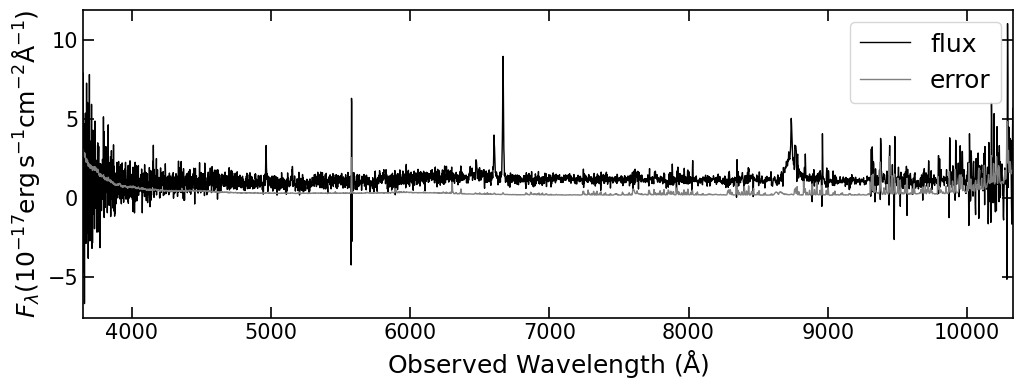

In [10]:
# read in the original SDSS spectrum
def read_sdss5_spec(spec_path, cutoff=100):
    spec = fits.getdata(spec_path,1)
    error = np.zeros(len(spec.IVAR))
    error[np.where(spec.IVAR!=0)] = 1/np.sqrt(spec.IVAR[np.where(spec.IVAR!=0)])
    ind_good = np.where((spec.IVAR>0)&(np.isfinite(spec.FLUX))&(np.isfinite(error)), True, False)
    ind_good[:cutoff] = False
    return 10**spec.LOGLAM[ind_good], spec.FLUX[ind_good], error[ind_good]

spec_path_v6_1_3 = '/data2/sdss5/v6_1_3/spectra/lite/'
specpath_sdss = spec_path_v6_1_3 + f"{obj.split('-')[0]:06}/{obj.split('-')[1]}/spec-{obj}.fits"
wave_sdss5, flux_sdss5, error_sdss5 = read_sdss5_spec(specpath_sdss)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(wave_sdss5, flux_sdss5, color='black', lw=1, label='flux')
ax.plot(wave_sdss5, error_sdss5, color='grey', lw=1, label='error')
ax.set_xlabel(r'Observed Wavelength ($\rm\AA$)', fontsize=18)
ax.set_xlim(wave_sdss5[0], wave_sdss5[-1])
ax.set_ylabel(r'$F_{\lambda} ({\rm 10^{-17}erg\,s^{-1}cm^{-2}\AA^{-1}})$', fontsize=18)
ax.legend(fontsize=18, loc='upper right')

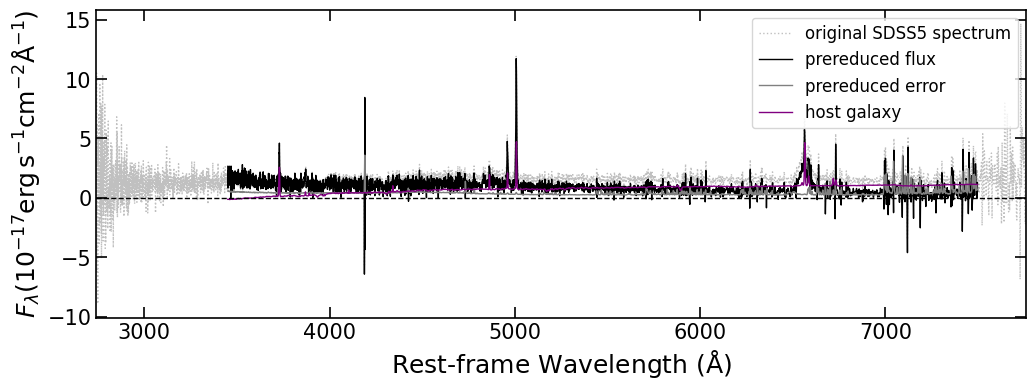

In [11]:
# visualize the prereduced spectrum
# the prereduced spectrum has been 1. corrected for Milky Way extinction, 2. shift to the rest frame, 3. removed host galaxy if possible

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

if 'wave_host' in op_spec.names:
    wave = op_spec.wave_host
    indwav = wave!=0
    wave = wave[indwav]
    flux = op_spec.flux_host[indwav]
    error = op_spec.err_host[indwav]
    flux_host = op_spec.flux_pca_host[indwav]
else:
    wave = op_spec.wave_prereduced
    flux = op_spec.flux_prereduced
    error = op_spec.error_prereduced

ax.plot(wave_sdss5/(1+op_data.redshift), flux_sdss5*(1+op_data.redshift), color='silver', lw=1, ls=':', label='original SDSS5 spectrum')
ax.plot(wave, flux, color='black', lw=1, label='prereduced flux')
ax.plot(wave, error, color='grey', lw=1, label='prereduced error')
if 'wave_host' in op_spec.names:
    ax.plot(wave, flux_host, color='purple', lw=1, label='host galaxy')
ax.axhline(0, color='black', lw=1, ls='--')
ax.set_xlim(wave_sdss5[0]/(1+op_data.redshift), wave_sdss5[-1]/(1+op_data.redshift))
ax.set_xlabel(r'Rest-frame Wavelength ($\rm\AA$)', fontsize=18)
ax.set_ylabel(r'$F_{\lambda} ({\rm 10^{-17}erg\,s^{-1}cm^{-2}\AA^{-1}})$', fontsize=18)
ax.legend(fontsize=12, loc='upper right')

# Note that the prereduced spectrum is truncated sometimes due to the wavelength limitation from the host galaxy templates

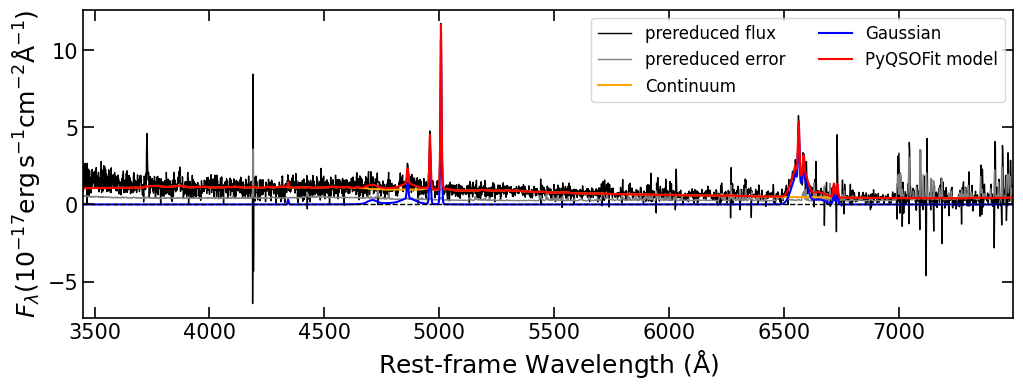

In [13]:
conti_flux, gaussian_flux = qsofit_op_flux(op_data, wave)

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(wave, flux, color='black', lw=1, label='prereduced flux')
ax.plot(wave, error, color='grey', lw=1, label='prereduced error')

ax.plot(wave, conti_flux, color='orange', lw=1.5, label='Continuum')
ax.plot(wave, gaussian_flux, color='blue', lw=1.5, label='Gaussian')
ax.plot(wave, gaussian_flux+conti_flux, color='red', lw=1.5, label='PyQSOFit model')

ax.axhline(0, color='black', lw=1, ls='--')
ax.set_xlim(wave[0], wave[-1])
ax.set_xlabel(r'Rest-frame Wavelength ($\rm\AA$)', fontsize=18)
ax.set_ylabel(r'$F_{\lambda} ({\rm 10^{-17}erg\,s^{-1}cm^{-2}\AA^{-1}})$', fontsize=18)
ax.legend(fontsize=12, ncol=2)
